# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Nesta etapa, o objetivo é compreender o problema de negócio que estamos tentando resolver. No caso, queremos prever a renda de indivíduos com base em variáveis como idade, educação, estado civil, entre outras. A previsão de renda pode ser útil para diversas aplicações, como avaliação de crédito, segmentação de clientes e planejamento de marketing.

## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa, realizamos uma análise exploratória dos dados para entender sua estrutura, distribuição e qualidade. Isso inclui a identificação de valores faltantes, outliers e a compreensão das relações entre as variáveis.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência da coleta de dados              | Object       |
| id_cliente              |  identificado único do indivíduo                    | Int          |
| sexo                    |  Sexo do indivíduo                                  | Object       |
| posse_de_veiculo        |  Indica se  possui veículo                          | Bool         |
| posse_de_imovel         |  Indica se possui imóvel                            | Bool         |
| qtd_filhos              |  Quantidade de filhos                               | Int          |
| tipo_renda              |  Tipo de renda                                      | Object       |
| educacao                |  Nivel de educação                                  | Object       |
| estado_civil            |  Estado civil                                       | Object       |
| tipo_residencia         |  Tipo de residência                                 | object       |
| idade                   |  Idade do indivíduo                                 |  Int         |
| tempo_emprego           |  Tempo de emprego                                   | Float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | Float        |
| renda                   |  Renda do indivíduo                                 | Float        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [35]:
!pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [162]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [164]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [81]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




Aqui, avaliamos as relações entre as variáveis, como correlações e distribuições conjuntas.


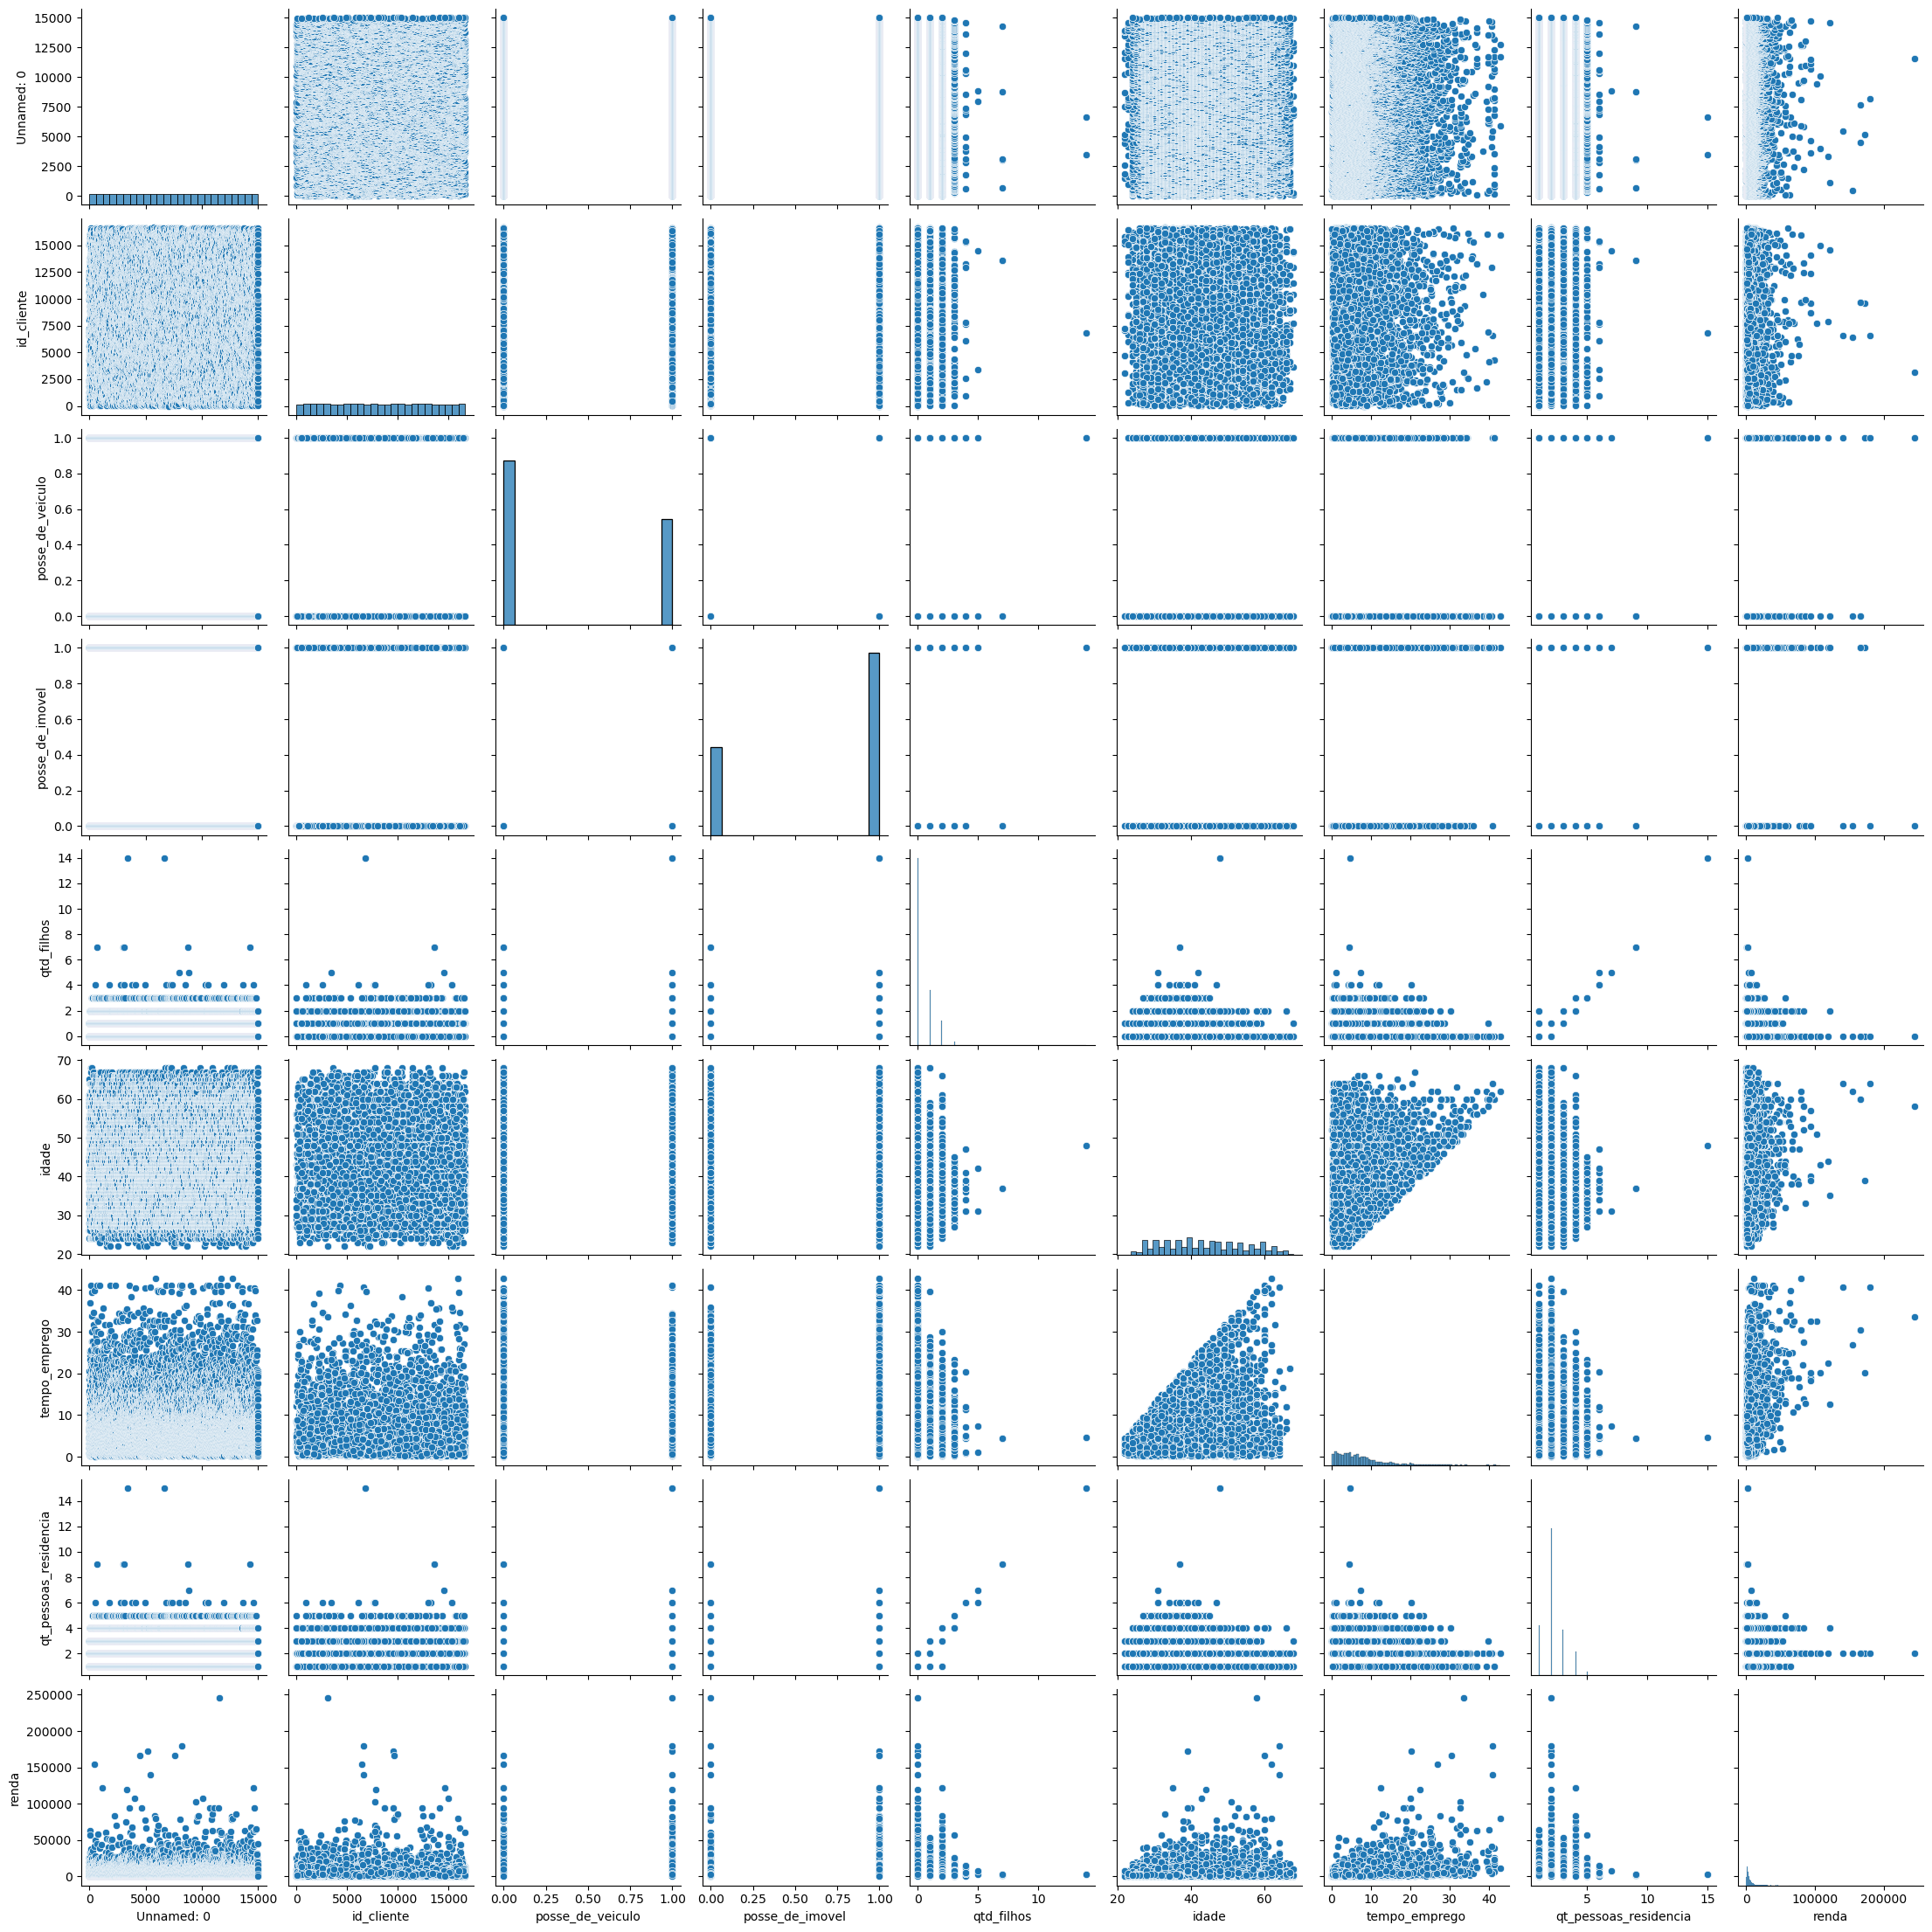

In [85]:
%matplotlib inline
sns.pairplot(renda)
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [89]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [90]:
colunas_relevantes = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda',
    'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
    'qt_pessoas_residencia', 'renda'
]
renda = renda[colunas_relevantes]

In [91]:
renda.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [92]:
renda['tempo_emprego'].fillna(renda['tempo_emprego'].median())

0         6.602740
1         7.183562
2         0.838356
3         4.846575
4         4.293151
           ...    
14995    13.887671
14996     6.013699
14997     7.832877
14998     4.298630
14999     7.219178
Name: tempo_emprego, Length: 15000, dtype: float64

In [93]:
renda.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

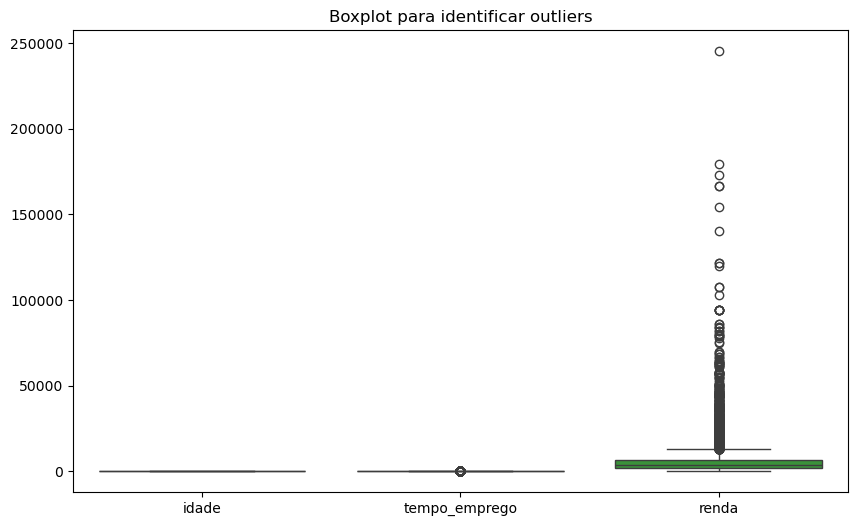

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=renda[['idade', 'tempo_emprego', 'renda']])
plt.title('Boxplot para identificar outliers')
plt.show()

In [111]:
renda.loc[:, 'renda'] = renda['renda'].clip(
    lower=renda['renda'].quantile(0.05),
    upper=renda['renda'].quantile(0.95)
)

In [123]:
renda.loc[:, 'idade_ao_quadrado'] = renda['idade'] ** 2
renda.loc[:, 'renda_per_capita'] = renda['renda'] / renda['qt_pessoas_residencia']

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
renda[['idade', 'tempo_emprego', 'renda', 'idade_ao_quadrado', 'renda_per_capita']] = scaler.fit_transform(
    renda[['idade', 'tempo_emprego', 'renda', 'idade_ao_quadrado', 'renda_per_capita']])

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [128]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth=3, random_state=42)

modelo_arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [130]:
modelo_arvore = DecisionTreeRegressor(max_depth=3, min_samples_split=20, random_state=42)

modelo_arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=20, random_state=42)

In [132]:
modelo_arvore = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

modelo_arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

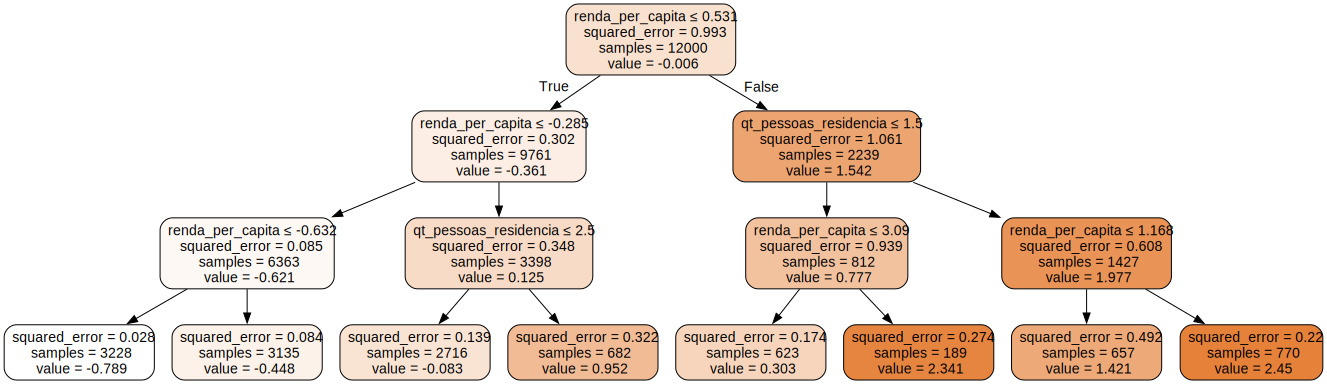

In [134]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    modelo_arvore,
    out_file=None,
    feature_names=X.columns,  
    filled=True,              
    rounded=True,             
    special_characters=True   
)

graph = graphviz.Source(dot_data)
graph

In [154]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_pred = modelo_arvore.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 0.3741806186900852
R²: 0.8635591207378368


## Etapa 5 Crisp-DM: Avaliação dos resultados


O modelo de Árvore de Decisão conseguiu prever a renda com um erro médio (RMSE) de 0.374, o que significa que as previsões estão bem próximas dos valores reais. Além disso, o R² de 0.864 indica que o modelo explica cerca de 86,4% da variação nos dados. Agora vamos comparar com Random Forest para ver se há resultados positivos adicionais. 

In [139]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(
    n_estimators=100,  
    max_depth=5,      
    random_state=42    
)

modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [141]:
y_pred_rf = modelo_rf.predict(X_test)

In [145]:
from sklearn.metrics import root_mean_squared_error, r2_score

rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'RMSE (Random Forest): {rmse_rf}')
print(f'R² (Random Forest): {r2_rf}')

RMSE (Random Forest): 0.09965103045971432
R² (Random Forest): 0.990322893516496


In [166]:
print("\nComparação:")
print(f"RMSE (Árvore de Decisão): 0.374")
print(f"R² (Árvore de Decisão): 0.864")
print(f"RMSE (Random Forest): {rmse_rf}")
print(f"R² (Random Forest): {r2_rf}")


Comparação:
RMSE (Árvore de Decisão): 0.374
R² (Árvore de Decisão): 0.864
RMSE (Random Forest): 0.09965103045971432
R² (Random Forest): 0.990322893516496


O Random Forest superou a Árvore de Decisão em precisão e capacidade de explicação:

- Precisão: Com um RMSE de 0.0996, o Random Forest erra menos nas previsões em comparação com a Árvore de Decisão (RMSE de 0.374).

- Explicação dos Dados: O R² de 0.9903 mostra que o Random Forest consegue explicar quase toda a variação nos dados, enquanto a Árvore de Decisão explica 86.4%.

Portanto, o Random Forest é a melhor opção para prever a renda, oferecendo resultados mais confiáveis e precisos.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import plotly.express as px


st.title('📊 Análise e Previsão de Renda')
st.markdown('''
Este aplicativo permite analisar dados de renda e prever valores com base em modelos de machine learning.
- **Análise Exploratória**: Visualize estatísticas e distribuições dos dados.
- **Modelagem**: Treine e avalie modelos de árvore de decisão e random forest.
- **Resultados**: Compare o desempenho dos modelos.
''')

st.divider()

uploaded_file = st.file_uploader("Carregue seu arquivo CSV", type="csv")
if uploaded_file is not None:
    renda = pd.read_csv(uploaded_file)
else:
    st.warning("Por favor, carregue um arquivo CSV.")
    st.stop()


colunas_irrelevantes = [col for col in renda.columns if 'Unnamed' in col or 'id_cliente' in col]
renda = renda.drop(columns=colunas_irrelevantes)


tab1, tab2, tab3, tab4 = st.tabs(["Análise Exploratória", "Modelagem", "Resultados", "Comentários"])


with tab1:
    st.subheader("Análise Exploratória")
    
    st.write("**Primeiras linhas do dataset:**")
    st.write(renda.head())

    st.write("**Estatísticas descritivas:**")
    st.write(renda.describe())

    st.write("**Valores faltantes por coluna:**")
    st.write(renda.isnull().sum())

    st.write("**Distribuição das variáveis numéricas (Plotly):**")
    st.write('''
    Os histogramas abaixo mostram a distribuição das variáveis numéricas. Eles ajudam a identificar:
    - **Assimetria**: Se os dados estão concentrados à esquerda ou à direita.
    - **Outliers**: Valores extremos que podem distorcer a análise.
    - **Tendência Central**: Onde a maioria dos dados está concentrada.
    ''')
    colunas_numericas = renda.select_dtypes(include=['int64', 'float64']).columns
    for coluna in colunas_numericas:
        fig = px.histogram(renda, x=coluna, nbins=30, title=f'Distribuição de {coluna}')
        st.plotly_chart(fig)


    st.write("**Matriz de Correlação:**")
    st.write('''
    A matriz de correlação mostra a relação linear entre as variáveis numéricas. Valores próximos de **1** indicam uma correlação positiva forte, enquanto valores próximos de **-1** indicam uma correlação negativa forte. Valores próximos de **0** indicam que não há correlação.
    ''')
    colunas_numericas = renda.select_dtypes(include=['int64', 'float64']).columns
    corr = renda[colunas_numericas].corr()  
    fig = px.imshow(corr, text_auto=True, color_continuous_scale='Viridis', title='Matriz de Correlação')

    fig.update_layout(xaxis=dict(tickangle=-90))

    st.plotly_chart(fig)


colunas_relevantes = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda',
    'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
    'qt_pessoas_residencia', 'renda'
]
renda = renda[colunas_relevantes]


renda['tempo_emprego'] = renda['tempo_emprego'].fillna(renda['tempo_emprego'].median())


renda['renda'] = renda['renda'].clip(
    lower=renda['renda'].quantile(0.05),
    upper=renda['renda'].quantile(0.95)
)


renda['idade_ao_quadrado'] = renda['idade'] ** 2
renda['renda_per_capita'] = renda['renda'] / renda['qt_pessoas_residencia']


colunas_categoricas = renda.select_dtypes(include=['object']).columns.tolist()
colunas_numericas = renda.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_numericas.remove('renda')  

preprocessador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(), colunas_categoricas)
    ]
)

X = renda.drop('renda', axis=1)
y = renda['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


with tab2:
    st.subheader("Modelagem")

    st.write("### Árvore de Decisão")
    max_depth = st.slider('Profundidade máxima da árvore', 1, 10, 3)
    min_samples_split = st.slider('Mínimo de amostras para dividir um nó', 2, 50, 20)
    min_samples_leaf = st.slider('Mínimo de amostras em uma folha', 1, 20, 10)

    modelo_arvore = Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('regressor', DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])
    modelo_arvore.fit(X_train, y_train)

    if st.checkbox('Mostrar árvore de decisão'):
        st.write("Visualização da árvore de decisão:")
        dot_data = export_graphviz(
            modelo_arvore.named_steps['regressor'],
            out_file=None,
            feature_names=colunas_numericas + list(modelo_arvore.named_steps['preprocessador'].named_transformers_['cat'].get_feature_names_out(colunas_categoricas)),
            filled=True,
            rounded=True,
            special_characters=True
        )
        st.graphviz_chart(dot_data)

    st.write("### Random Forest")
    n_estimators = st.slider('Número de árvores', 10, 200, 100)
    max_depth_rf = st.slider('Profundidade máxima da árvore (RF)', 1, 10, 5)

    modelo_rf = Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('regressor', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth_rf,
            random_state=42
        ))
    ])
    modelo_rf.fit(X_train, y_train)

with tab3:
    st.subheader("Resultados")

    st.write("### Avaliação da Árvore de Decisão")
    y_pred = modelo_arvore.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  
    rmse = mse ** 0.5  
    r2 = r2_score(y_test, y_pred)
    st.write(f'**RMSE (Árvore de Decisão):** {rmse:.3f}')
    st.write(f'**R² (Árvore de Decisão):** {r2:.3f}')
    st.write('''
    - **RMSE (Root Mean Squared Error)**: Mede a diferença média entre os valores previstos e os reais. Quanto menor, melhor.
    - **R² (Coeficiente de Determinação)**: Indica a proporção da variância dos dados que é explicada pelo modelo. Valores próximos de **1** indicam um bom ajuste.
    ''')

    st.divider()

   
    st.write("### Avaliação do Random Forest")
    y_pred_rf = modelo_rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)  
    rmse_rf = mse_rf ** 0.5  
    r2_rf = r2_score(y_test, y_pred_rf)
    st.write(f'**RMSE (Random Forest):** {rmse_rf:.3f}')
    st.write(f'**R² (Random Forest):** {r2_rf:.3f}')
    st.write('''
    - O **Random Forest** geralmente tem um desempenho melhor que a Árvore de Decisão, pois combina várias árvores para reduzir o overfitting.
    - Comparando os dois modelos, o Random Forest tende a ter um **RMSE menor** e um **R² maior**, indicando um melhor ajuste aos dados.
    ''')

    st.divider()

    st.write("### Comparação dos Modelos")
    st.write(f"**RMSE (Árvore de Decisão):** {rmse:.3f}")
    st.write(f"**R² (Árvore de Decisão):** {r2:.3f}")
    st.write(f"**RMSE (Random Forest):** {rmse_rf:.3f}")
    st.write(f"**R² (Random Forest):** {r2_rf:.3f}")
    st.write('''
    - O **Random Forest** superou a Árvore de Decisão em termos de RMSE e R².
    - Isso ocorre porque o Random Forest é um método de ensemble, que combina várias árvores para melhorar a precisão e a generalização.
    ''')


with tab4:
    st.subheader("Comentários")
    st.write("Deixe seu comentário sobre as análises ou o aplicativo:")
    
    comentario = st.text_area("Escreva seu comentário aqui:", height=150)
    
    if st.button("Enviar Comentário"):
        if comentario.strip() == "":
            st.warning("Por favor, escreva um comentário antes de enviar.")
        else:
            st.success("Comentário enviado com sucesso!")
            st.write("Seu comentário foi:", comentario)